In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pre-processing of fact table data

In [24]:
# data = pd.read_csv("/Users/bhavikasewpal/Desktop/CSI4142-Phase-4/data/dataset_file.csv")
# data.head(10)

# data['fweatherdate'] = pd.to_datetime(data['fweatherdate'])
# data['fcasedate'] = pd.to_datetime(data['fcasedate'])
# data['fvaccinationdate'] = pd.to_datetime(data['fvaccinationdate'])

# data.head(10)

In [25]:
# grouped = data.groupby(["fweatherid","fweatherdate"])[["temperature","proportionfullyvaccinated", "ratechangecases"]].mean()
# grouped.head(20)
# grouped.to_csv("/Users/bhavikasewpal/Desktop/CSI4142-Phase-4/data/grouped.csv")

In [4]:
# Read grouped data
data = pd.read_csv("/Users/bhavikasewpal/Desktop/CSI4142-Phase-4/Part-A/data/grouped.csv")
data['date'] = pd.to_datetime(data['date'])
# Encode nominal variable date (contains 26 distinct values)
data['date'] = data['date'].apply(lambda x: x.toordinal())

In [5]:
!pip install category_encoders
import category_encoders as ce

In [6]:
encoder = ce.OneHotEncoder(cols=['weatherid']) 

encoder

data = encoder.fit_transform(data)
data.head()

,weatherid_1,weatherid_2,weatherid_3,weatherid_4,weatherid_5,weatherid_6,weatherid_7,weatherid_8,weatherid_9,weatherid_10,...,weatherid_60,weatherid_61,weatherid_62,weatherid_63,weatherid_64,weatherid_65,date,temperature,proportionfullyvaccinated,ratechangecases
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,737760,5.6,0.000,817.275
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,737791,5.3,0.060,1136.350
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,737822,4.1,0.825,1408.045
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,737850,7.2,1.700,1687.380
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,737881,10.9,1.700,2145.950


In [7]:
predictors = data.loc[:, data.columns.drop('ratechangecases')]
predictors.head(20)
X = predictors.values
Y = data['ratechangecases'].values

In [8]:
!pip install scikit-learn

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10)

Decision Tree algorithm

In [34]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=44)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=44)

In [35]:
y_pred = regressor.predict(X_test)

In [13]:
results = pd.DataFrame()
results['true-value'] = y_test
results['prediction'] = y_pred
results.head(30)

,true-value,prediction
0,4683.2000,4683.2000
1,1035.0325,1035.0325
2,16876.4380,16876.4380
3,385.5225,385.5225
4,7318.4580,7318.4580
5,9953.1920,9953.1920
6,8712.9300,8712.9300
7,4271.4080,2794.2800
8,9895.0000,9895.0000
9,13970.8460,13970.8460


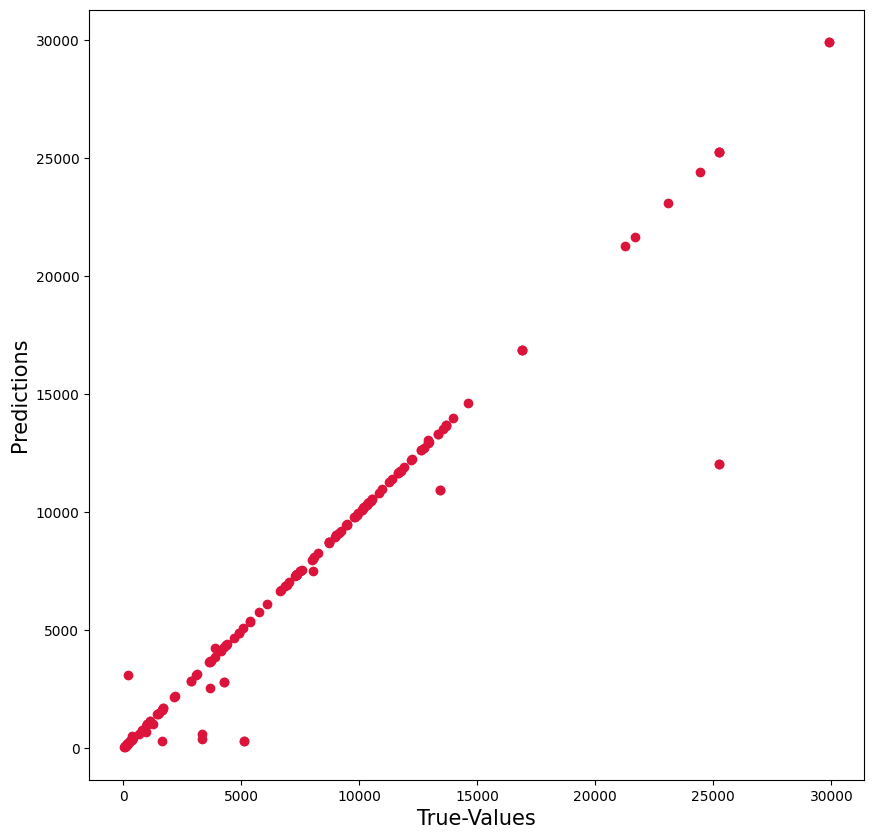

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.xlabel('True-Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred))

2599852.7602869226


In [16]:
print(mean_squared_error(y_test,y_pred)**0.5)

1612.4058919164625


In [17]:
print(mean_absolute_error(y_test, y_pred))

335.7743455621304


In [18]:
print(r2_score(y_test, y_pred))

0.9374166938437835


Random Forest Algorithms

In [26]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 44)

 
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=44)

In [27]:
rf_predictions = regressor.predict(X_test)

In [28]:
print(mean_squared_error(y_test,rf_predictions))

657452.5713086464


In [29]:
print(mean_squared_error(y_test,rf_predictions)**0.5)

810.8344906999494


In [30]:
print(mean_absolute_error(y_test, rf_predictions))

458.59992610059334


In [31]:
print(r2_score(y_test, rf_predictions))

0.984173890082583


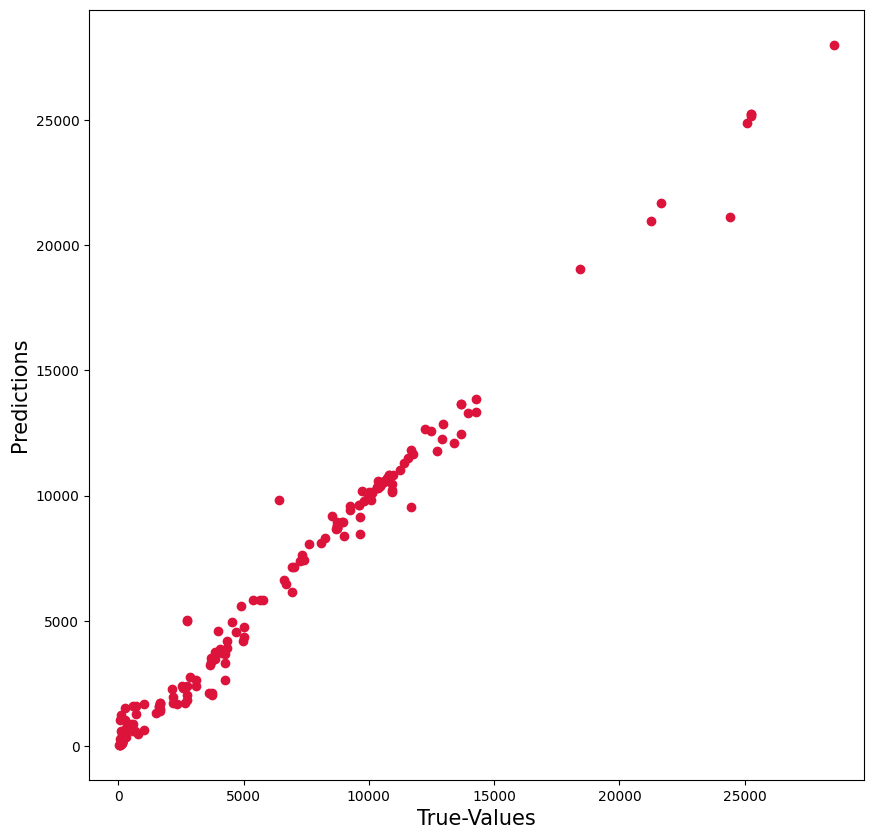

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, rf_predictions, c='crimson')
plt.xlabel('True-Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(random_state=44)

regressor.fit(X_train, y_train)

gb_predictions = regressor.predict(X_test)

In [22]:
print(mean_squared_error(y_test,gb_predictions))

3794678.0992454863


In [23]:
print(mean_squared_error(y_test,gb_predictions)**0.5)

1947.9933519510498


In [24]:
print(mean_absolute_error(y_test, gb_predictions))

1416.5855771956928


In [25]:
print(r2_score(y_test, gb_predictions))

0.9086550189007007


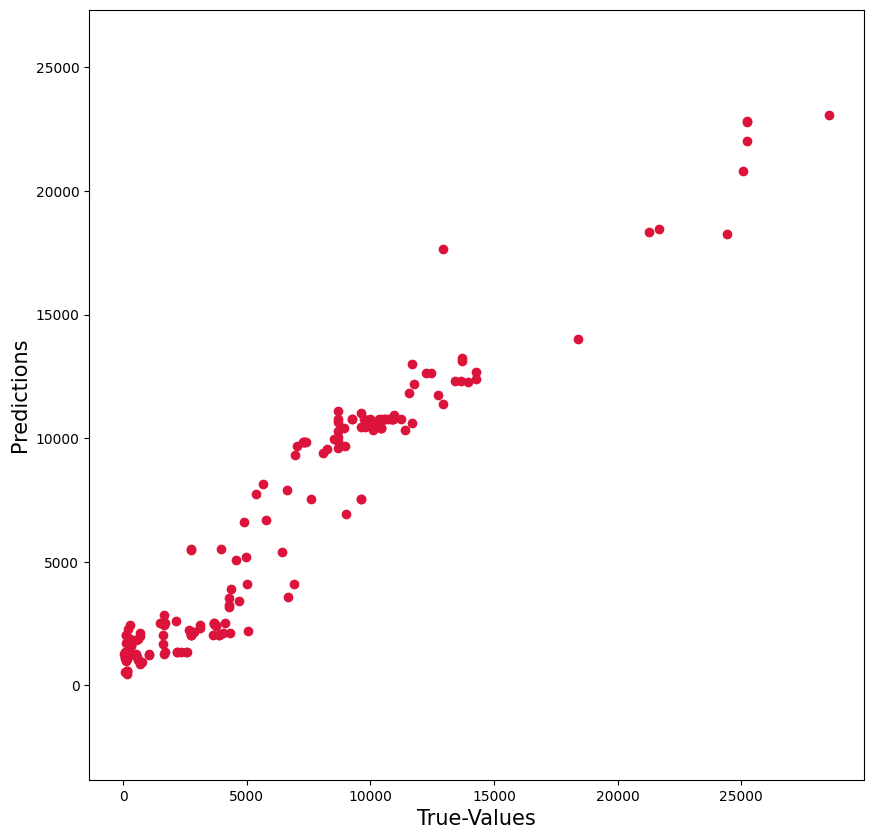

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, gb_predictions, c='crimson')
plt.xlabel('True-Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()